# Machine Learning Project

# Code file from group 30

In [1]:
#imports for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_curve, precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, RocCurveDisplay, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,f1_score, precision_score, roc_auc_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns



# Data import and processing

In [2]:
#loading the data directly as an array, and see what it looks like
train_data = np.loadtxt("train_data.csv", delimiter=",", dtype=float)
train_data

array([[-2.65e-01, -2.65e-01, -2.90e-01, ..., -1.90e-01, -2.00e-01,
         0.00e+00],
       [-1.10e-01, -1.10e-01, -1.05e-01, ..., -2.80e-01, -2.75e-01,
         1.20e+01],
       [-3.80e-01, -3.80e-01, -4.00e-01, ..., -4.10e-01, -4.25e-01,
         0.00e+00],
       ...,
       [-3.75e-01, -3.90e-01, -4.00e-01, ..., -3.95e-01, -3.85e-01,
         0.00e+00],
       [-6.30e-01, -6.40e-01, -6.55e-01, ..., -7.10e-01, -7.15e-01,
         3.00e+00],
       [-1.50e-01, -1.55e-01, -1.75e-01, ..., -5.00e-03,  0.00e+00,
         0.00e+00]])

Text(0.5, 1.0, 'First Heartbeat of the data')

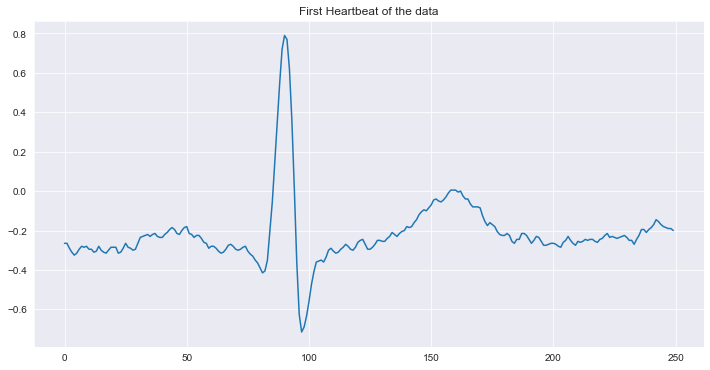

In [4]:
#Plot of the first heartbeat
plt.figure(figsize = (12, 6))
plt.plot(train_data[0, :250])
plt.title("First Heartbeat of the data")

In [3]:
#import other files and separate them into data and label
x_train, y_train = train_data[:, :250], train_data[:, 250]

test_data = np.loadtxt("test_data.csv", delimiter=",", dtype=float)
x_test, y_test = test_data[:, :250], test_data[:, 250]

val_data = np.loadtxt("val_data.csv", delimiter=",", dtype=float)
x_val, y_val = val_data[:, :250], val_data[:, 250]


In [6]:
x_val

array([[-0.5  , -0.475, -0.46 , ..., -0.565, -0.58 , -0.585],
       [-0.105, -0.105, -0.11 , ..., -0.04 , -0.06 , -0.06 ],
       [ 0.   , -0.02 , -0.015, ..., -0.05 , -0.06 , -0.05 ],
       ...,
       [-0.135, -0.135, -0.15 , ..., -0.075, -0.07 , -0.075],
       [-0.07 , -0.075, -0.08 , ..., -0.13 , -0.125, -0.115],
       [-0.305, -0.31 , -0.33 , ..., -0.16 , -0.17 , -0.185]])

In [7]:
#shapes of the datas.
print("shape of x_train :", x_train.shape)
print("shape of x_test :", x_test.shape)
print("shape of x_val :", x_val.shape)

shape of x_train : (65670, 250)
shape of x_test : (21891, 250)
shape of x_val : (21891, 250)


array([4.5012e+04, 4.2150e+03, 4.8430e+03, 4.3530e+03, 1.0000e+01,
       1.3700e+02, 1.5280e+03, 9.0000e+01, 4.9000e+01, 2.0000e+00,
       6.4000e+01, 4.8100e+02, 4.2770e+03, 5.8900e+02, 2.0000e+01])

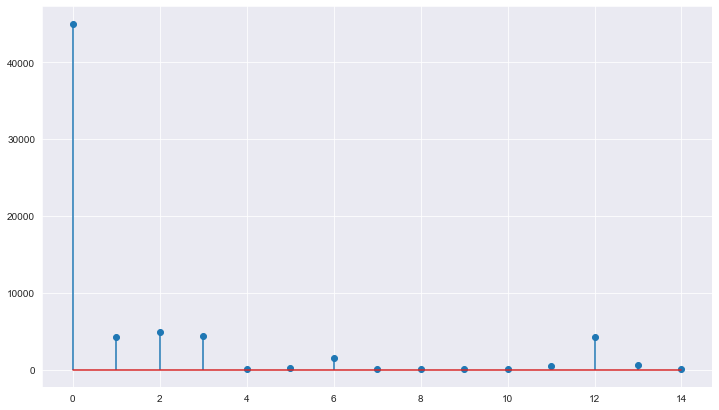

In [8]:
#ratios of every label in the train data
ratios = np.zeros(15)
for y in y_train:
    ratios[int(y)] += 1
    
plt.figure(figsize = (12, 7))    
plt.stem(ratios)
ratios

Apply PCA to whole data

In [4]:
#Apply PCA to create new sets of data
#We fit the PCA with the training data, then transform all the datasets
pca = PCA()
pca.fit(x_train) #or x_train
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
x_val_pca = pca.transform(x_val)
#maybe we should take the first 4-5 dimensions only

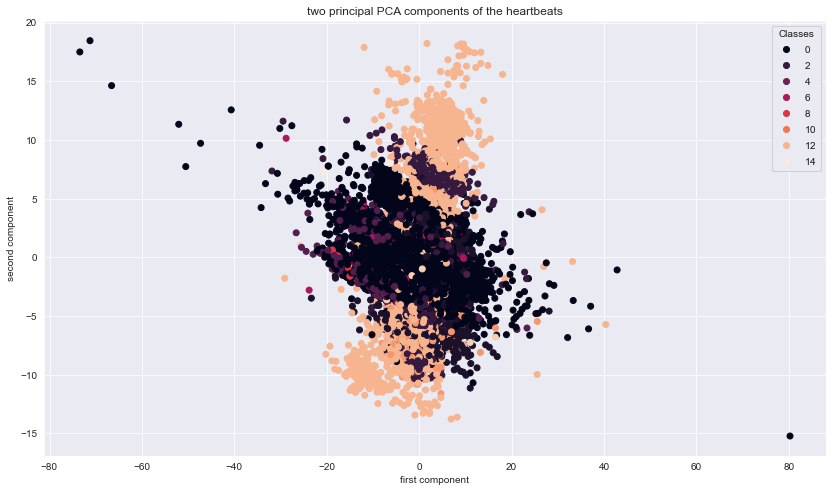

In [10]:
#plot of the first 2 components of each data point
fig, ax = plt.subplots(figsize = (14, 8))
scatter = ax.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, )
ax.set_xlabel("first component")
ax.set_ylabel("second component")
ax.set_title("two principal PCA components of the heartbeats")
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.add_artist(legend1)

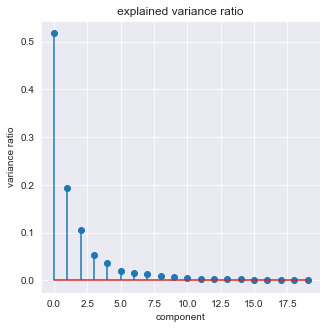

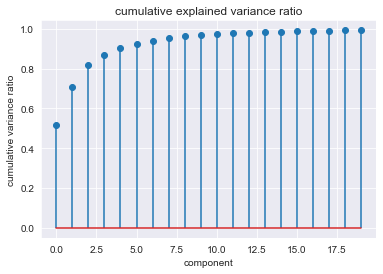

In [11]:
#Plots of the explained variances of each dimension
plt.figure(figsize=(5,5))
plt.stem(pca.explained_variance_ratio_[:20])
plt.title("explained variance ratio")
plt.ylabel("variance ratio")
plt.xlabel("component")
plt.show()

cumul_var = np.copy(pca.explained_variance_ratio_[:20])
for i in range(1, len(cumul_var)):
    cumul_var[i] += cumul_var[i-1]
plt.stem(cumul_var)
plt.title("cumulative explained variance ratio")
plt.ylabel("cumulative variance ratio")
plt.xlabel("component")
plt.show()

We can see that the first two dimensions are the most important ones, with more than two thirds of the total explained variance. The first ten dimension explain more than 95% of all the explained variance. We will only keep them.

In [12]:
#We only keep the first 10 dimensions of the PCA
#for i in range(len(x_train_pca))
x_train_pca = x_train_pca[:,:10]
x_test_pca = x_test_pca[:, :10]
x_val_pca = x_val_pca[:, :10]
x_val_pca

array([[-5.67686204e+00,  8.54642394e-01,  1.56864667e+00, ...,
        -3.47901722e-01, -8.64955633e-01,  4.72573646e-01],
       [ 1.91836536e+00, -3.97304808e+00, -1.53355084e+00, ...,
        -1.20763328e-01,  6.26216708e-02,  5.18110576e-01],
       [ 4.12510983e+00, -1.51913522e+00, -8.51891052e-01, ...,
        -3.79724941e-02, -7.96441189e-03,  2.35750948e-01],
       ...,
       [ 3.74877514e+00, -1.56164121e+00, -5.88828686e-01, ...,
         3.65785810e-01,  2.60211067e-01,  6.89074080e-02],
       [ 3.73169859e+00, -1.04503225e+00, -1.05258501e+00, ...,
        -2.25462691e-01, -3.17757195e-02, -1.12707940e-01],
       [ 2.06675682e+00,  7.07373915e+00, -4.82179030e-01, ...,
        -2.96082057e-01,  4.87809198e-01, -5.29017114e-03]])

Use of the Standard scaler

In [5]:
# standard scaler
scaler = StandardScaler()
scaler.fit(x_train)
#I fit the scaler using x_train

#new scaled datasets 
x_train_scale = scaler.transform(x_train)
x_test_scale = scaler.transform(x_test)
x_val_scale = scaler.transform(x_val)

# Model training and testing

Using Classifier function from Code lab 4

In [6]:
def Classifier(clf,x_train,y_train,x_test,y_test):
    #fit the model
    clf.fit(x_train, y_train)
    19
    #predict on the test set
    y_pred = clf.predict(x_test)
    # print the scores
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division= 1.0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division= 1.0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division= 1.0)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    # plot the confusion matrix
    plt.figure(figsize=(5,5))
    confusion_mat =confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [7]:
#And a shorter version of it, which trains the model and returns the accuracy :
def accu_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [102]:
#returns the accuracy, the accuracy without label 0 (abnormal accuracy) and the f1 score
def abn_accu_classifier(clf, x_train, y_train, x_test, y_test):
    #train the model
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    #compute the abnormal accuracy
    conf_mat = confusion_matrix(y_test, y_pred)
    n_normal = 0
    n_true_pos = 0
    for y in y_test:
        n_normal += (y==0)
    for i in range(1, len(conf_mat[0])):
        n_true_pos += conf_mat[i][i]
    abn_accuracy = n_true_pos/(len(y_test) - n_normal) 
    #abn_accuracy = accuracy_score(y_test, y_pred, average = 'macro', zero_division = 1.0)
    #compute accuracy anf f1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1_score_ = f1_score(y_test, y_pred, average='macro', zero_division = 1.0)
    
    return [abn_accuracy, accuracy, f1_score_]

In [100]:
def weighted_f1(y_test, y_pred):
    return f1_score(y_test, y_pred, average='macro', zero_division = 1.0)

# MLP Neural Networks

In [21]:
#we try to find the most performant activation and number of layers
#tested with 1 to 5 layers
activation = ['logistic', 'tanh', 'relu']
layer_size = [(100), (100, 100), (100, 100, 100), (100, 100, 100, 100), (100, 100, 100, 100, 100)]
#lists of metrics
acc_rec = []
abn_acc_rec = []
f1_rec = []

for i in activation:
    for j in layer_size : 
        mlp = MLPClassifier(hidden_layer_sizes=j, activation=i, max_iter=100, random_state=42)
        metrics = abn_accu_classifier(mlp, x_train, y_train, x_val, y_val)
        abn_acc_rec.append(metrics[0])
        acc_rec.append(metrics[1])
        f1_rec.append(metrics[2])



C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

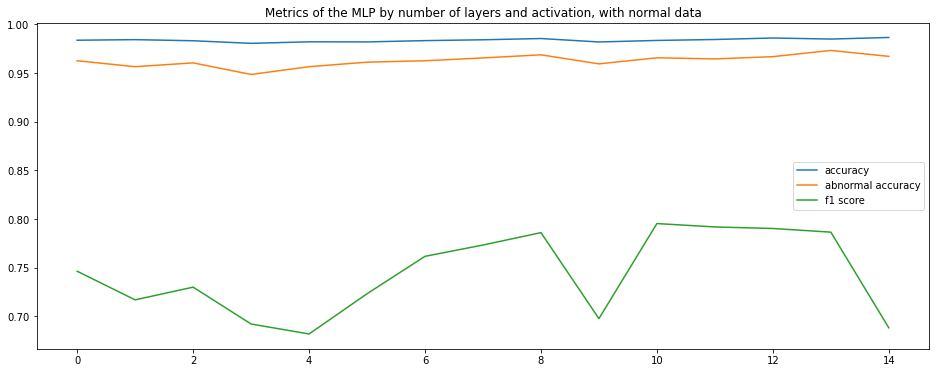

In [22]:
#plot all the metrics together
plt.figure(figsize= (16, 6))
plt.plot(acc_rec, label = "accuracy")
plt.plot(abn_acc_rec, label = "abnormal accuracy")
plt.plot(f1_rec, label = "f1 score")
plt.legend()
plt.title("Metrics of the MLP by number of layers and activation, with normal data")
plt.show()



The first 5 values correspond to logistic activation, with 1 to 5 layers. The next five values have a tanh activation, with 1 to layers. The last 5 values have relu activation, with 1 to 5 layers as well.

We can see that the metric that can help us choose the best performing model is the abnormal accuracy, since it's values differ more between models. The accuracy and f1 scores of the models are very close to each other, both for the normal accuracy and the abnormal accuracy. The best performing model is the DNN with 4 layers with relu activation. The second best performing model is the 3 layers DNN with tanh activation.

In [23]:
print(acc_rec[13])
print(abn_acc_rec[13])
f1_rec[13]

0.9849709926453794
0.9732791170490851


0.7865305663040241

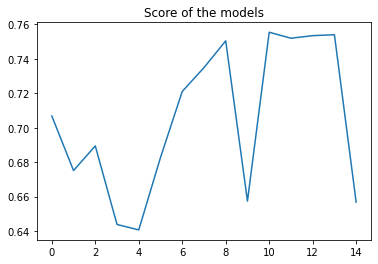

In [139]:
#We multiply the three metrics together to compare them, and get a unique score
def mult_classif(acc_rec, abn_acc_rec, f1_rec):
    classif = np.zeros(len(acc_rec))
    for i in range(len(acc_rec)):
        classif[i] = acc_rec[i]*abn_acc_rec[i]*f1_rec[i]
    
    plt.plot(classif)
    plt.title("Score of the models")
    plt.show()
    
mult_classif(acc_rec, abn_acc_rec, f1_rec)

We will try to improve three models,the one layer with relu activation, the three layers with tanh activation, and the four layers with relu activation. We won't keep the 5 layers model because it takes longer to train it than for smaller sized models, and is as performant as a 3 layered model. 

# Tuning of the one layered MLP

In [94]:
size = [50, 100, 150, 200, 250]
metrics_rec1 = []
for i in size:
    mlp1 = MLPClassifier(hidden_layer_sizes=(size), activation = 'relu', max_iter = 100)
    metrics_rec1.append(abn_accu_classifier(mlp1, x_train, y_train, x_val, y_val))

C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


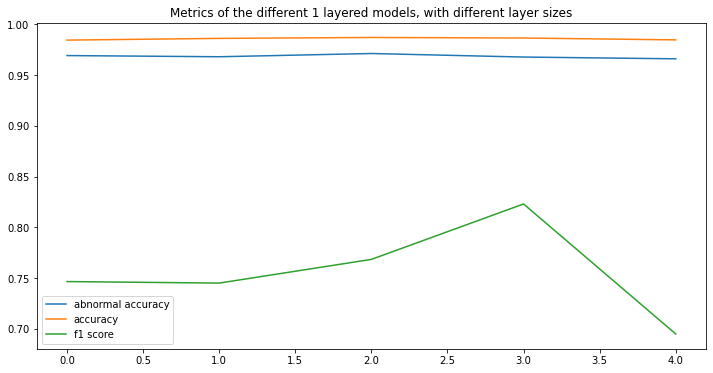

[0.9684867847807145, 0.9863870997213466, 0.7948745875651619]

In [119]:
#display the results
plt.figure(figsize = (12, 6))
plt.plot(metrics_rec1, label = ("abnormal accuracy", "accuracy", "f1 score"))
plt.title("Metrics of the different 1 layered models, with different layer sizes")
plt.legend()
plt.show()

metrics_rec3[3]

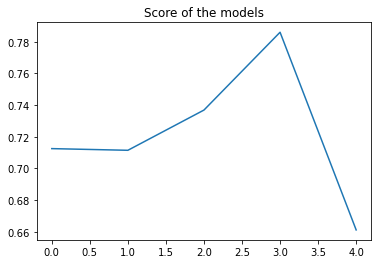

In [96]:
#extract and multiply all metrics together
acc1 = []
abn_acc1 = []
f1_1 = []

for i in range(len(metrics_rec1)):
    acc1.append(metrics_rec1[i][0])
    abn_acc1.append(metrics_rec1[i][1])
    f1_1.append(metrics_rec1[i][2])

mult_classif(acc1, abn_acc1, f1_1)

The best one layered MLP model is obtained with hidden layer size = 200

# Tuning of the three layers MLP

In [25]:
#Training of deep NN, with 3 layers, by adjusting the size of the layers
layers_size = [50, 100, 150]
metrics_rec3 = []

for i in layers_size:
    for j in layers_size:
        for k in layers_size:
            mlp = MLPClassifier(hidden_layer_sizes=(i, j, k), activation = 'relu', max_iter = 100)
            metrics_rec3.append(abn_accu_classifier(mlp, x_train, y_train, x_val, y_val))


C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

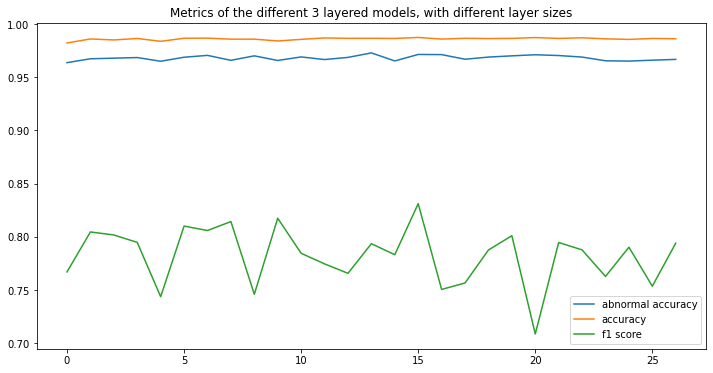

[0.9668893406912576, 0.9865698232150198, 0.7567412153271481]

In [26]:
#display the results
plt.figure(figsize = (12, 6))
plt.plot(metrics_rec3, label = ("abnormal accuracy", "accuracy", "f1 score"))
plt.title("Metrics of the different 3 layered models, with different layer sizes")
plt.legend()
plt.show()

metrics_rec3[17]

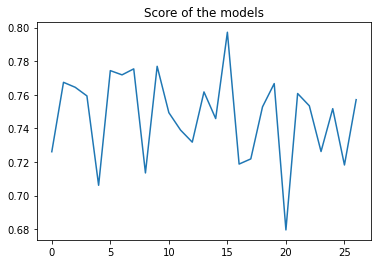

In [27]:
#extract and multiply all metrics together
acc = []
abn_acc = []
f1 = []

for i in range(27):
    acc.append(metrics_rec3[i][0])
    abn_acc.append(metrics_rec3[i][1])
    f1.append(metrics_rec3[i][2])

mult_classif(acc, abn_acc, f1)

In [36]:
metrics_rec3[9]

[0.9713912285797269, 0.987346398063131, 0.8312272862074016]

In [38]:
#record of the parameters used for each model
ind_rec = []

for i in layers_size:
    for j in layers_size:
        for k in layers_size:
            ind_rec.append((i, j , k))
print(ind_rec)
print(ind_rec[9])

[(50, 50, 50), (50, 50, 100), (50, 50, 150), (50, 100, 50), (50, 100, 100), (50, 100, 150), (50, 150, 50), (50, 150, 100), (50, 150, 150), (100, 50, 50), (100, 50, 100), (100, 50, 150), (100, 100, 50), (100, 100, 100), (100, 100, 150), (100, 150, 50), (100, 150, 100), (100, 150, 150), (150, 50, 50), (150, 50, 100), (150, 50, 150), (150, 100, 50), (150, 100, 100), (150, 100, 150), (150, 150, 50), (150, 150, 100), (150, 150, 150)]
(100, 50, 50)


ind_rec corresponds to the layer sizes used to train the models. Thus, the first model has been trained with layer sizes (50, 50, 50), the second with sizes (50, 50, 100) and so on

The best performing 3 layers model is thus obtained with layer sizes (100, 100, 100) 

# Tuning of the four layers DNN

In [138]:
#from previous tests, this was the best model, I included it as a bonus
mlp = MLPClassifier(hidden_layer_sizes=(150, 100, 100, 150), activation = 'relu', max_iter = 150)
print(abn_accu_classifier(mlp, x_train, y_train, x_val, y_val))

[0.9725530060993319, 0.9865698232150198, 0.7712442634744996]


In [41]:
#Since doing a grid search with many layer sizes would take too much time, we tune it with 2 sizes : 50 and 150
sizes = [50, 150]
metrics_rec4 = []

for i in sizes:
    for j in sizes:
        for k in sizes:
            for s in sizes:
                mlp = MLPClassifier(hidden_layer_sizes=(i, j, k, s), activation = 'relu', max_iter = 100)
                metrics_rec4.append(abn_accu_classifier(mlp, x_train, y_train, x_val, y_val))
                
                

C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

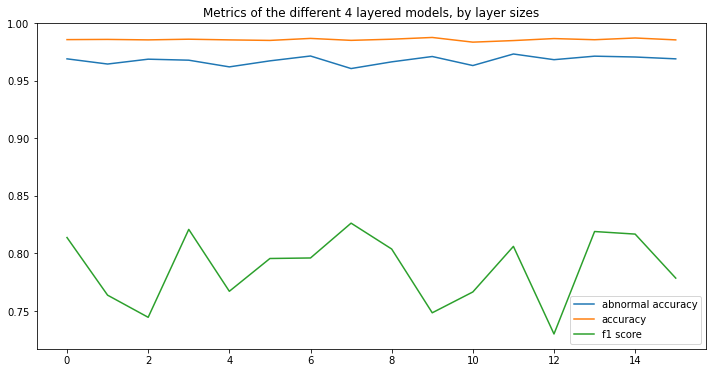

In [46]:
#display the results
plt.figure(figsize = (12, 6))
plt.plot(metrics_rec4, label = ("abnormal accuracy", "accuracy", "f1 score"))
plt.title("Metrics of the different 4 layered models, by layer sizes")
plt.legend()
plt.show()

In [78]:
#records of the parameters used
ind_rec4 = []
for i in sizes:
    for j in sizes:
        for k in sizes:
            for s in sizes :
                ind_rec4.append((i, j, k, s))
print(ind_rec4)
ind_rec4[7]

[(50, 50, 50, 50), (50, 50, 50, 150), (50, 50, 150, 50), (50, 50, 150, 150), (50, 150, 50, 50), (50, 150, 50, 150), (50, 150, 150, 50), (50, 150, 150, 150), (150, 50, 50, 50), (150, 50, 50, 150), (150, 50, 150, 50), (150, 50, 150, 150), (150, 150, 50, 50), (150, 150, 50, 150), (150, 150, 150, 50), (150, 150, 150, 150)]


(50, 150, 150, 150)

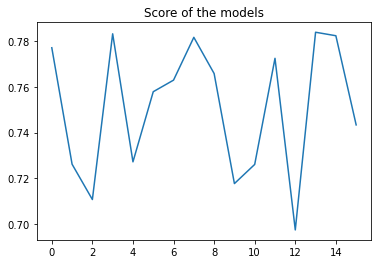

In [140]:
#multiply all metrics together
acc4 = []
abn_acc4 = []
f1_4 = []
for i in range(len(metrics_rec4)):
    acc4.append(metrics_rec4[i][0])
    abn_acc4.append(metrics_rec4[i][1])
    f1_4.append(metrics_rec4[i][2])

mult_classif(acc4, abn_acc4, f1_4)

In [52]:
metrics_rec4[13]

[0.9712460063897763, 0.985519163126399, 0.819021598590016]

The best performing models are obtained with layers (150, 150, 50, 150), (50, 50, 150, 150) and (50, 150, 150, 150), hte best model being (150, 150, 50, 150)

We should test the Neural networks but this time with scaled data and PCA data. Let's take the five best parameter sets for normal data and apply it to the scaled and PCA data.

# MLP with scaled data

In [53]:
# MLP with scaled data
best_param = [(100, 100, 100),(100, 150, 50), (100, 50, 50),(100, 100, 100, 100),
              (150, 100, 100, 150), (50, 50, 150, 150), (150, 150, 50, 150), (150, 150, 50, 150)]
metrics_scale = []
for param in best_param:
    if len(param)==3:
        mlp = MLPClassifier(hidden_layer_sizes=param, activation = 'tanh', max_iter = 100)
        metrics_scale.append(abn_accu_classifier(mlp, x_train_scale, y_train, x_val_scale, y_val))
    else :
        mlp = MLPClassifier(hidden_layer_sizes=param, activation = 'relu', max_iter = 100)
        metrics_scale.append(abn_accu_classifier(mlp, x_train_scale, y_train, x_val_scale, y_val))


C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


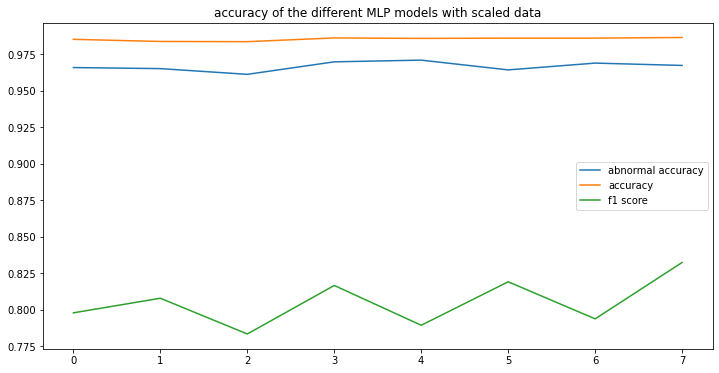

In [54]:
#display the results
plt.figure(figsize = (12, 6))
plt.plot(metrics_scale, label = ("abnormal accuracy", "accuracy", "f1 score"))
plt.title("accuracy of the different MLP models with scaled data")
plt.legend()
plt.show()

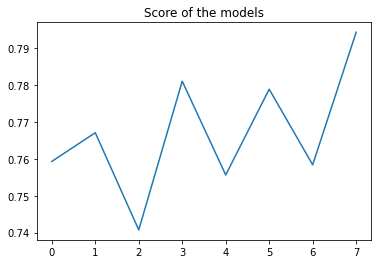

In [55]:
#multiply all metrics together
acc_scale = []
abn_acc_scale = []
f1_scale = []
for i in range(len(metrics_scale)):
    acc_scale.append(metrics_scale[i][0])
    abn_acc_scale.append(metrics_scale[i][1])
    f1_scale.append(metrics_scale[i][2])

mult_classif(acc_scale, abn_acc_scale, f1_scale)

In [56]:
metrics_scale[2]

[0.9612256752831833, 0.9836005664428303, 0.7834459493490121]

The best MLP model using scaled data is obtained with relu activation and layer sizes (150, 150, 50, 150) 

# MLP with PCA Data

In [57]:
#MLP with PCA data
best_param = [(100, 100, 100),(100, 150, 50), (100, 50, 50),(100, 100, 100, 100),
              (150, 100, 100, 150), (50, 50, 150, 150), (150, 150, 50, 150), (150, 150, 50, 150)]
metrics_pca = []

for param in best_param:
    if len(param)==3:
        mlp = MLPClassifier(hidden_layer_sizes=param, activation = 'tanh', max_iter = 100)
        metrics_pca.append(abn_accu_classifier(mlp, x_train_pca, y_train, x_val_pca, y_val))
    else :
        mlp = MLPClassifier(hidden_layer_sizes=param, activation = 'relu', max_iter = 100)
        metrics_pca.append(abn_accu_classifier(mlp, x_train_pca, y_train, x_val_pca, y_val))



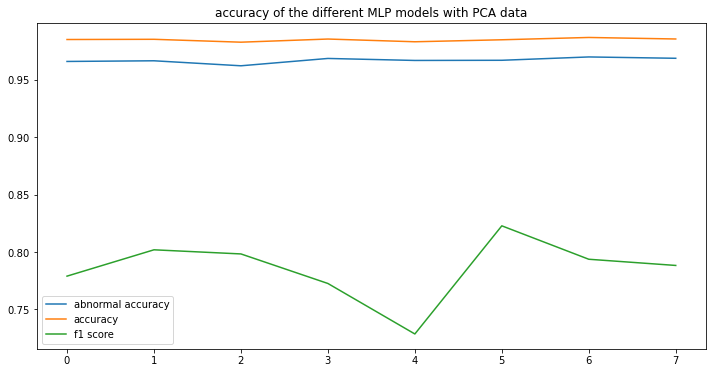

In [58]:
#display the results
plt.figure(figsize = (12, 6))
plt.plot(metrics_pca, label = ("abnormal accuracy", "accuracy", "f1 score"))
plt.title("accuracy of the different MLP models with PCA data")
plt.legend()
plt.show()

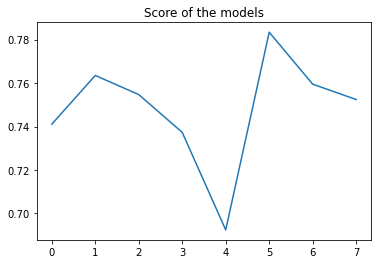

In [59]:
#multiply all metrics together
acc_pca = []
abn_acc_pca = []
f1_pca = []
for i in range(len(metrics_pca)):
    acc_pca.append(metrics_pca[i][0])
    abn_acc_pca.append(metrics_pca[i][1])
    f1_pca.append(metrics_pca[i][2])

mult_classif(acc_pca, abn_acc_pca, f1_pca)

In [60]:
metrics_pca[6]

[0.9697937844902701, 0.9867525467086931, 0.7936787837803595]

The best model using PCA data is thus obtained with layer sizes (50, 50, 150, 150)

 # Logistic regression

In [61]:
# Using normal data
#one versus rest regressions
metrics_lr = []
lr_ovr = LogisticRegression(multi_class = 'ovr', max_iter = 1000)
metrics_lr.append(abn_accu_classifier(lr_ovr, x_train, y_train, x_val, y_val))

#multinomial regression
lr_multi = LogisticRegression(multi_class = 'multinomial')
metrics_lr.append(abn_accu_classifier(lr_multi, x_train, y_train, x_val, y_val))

C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
# Linear regression using scaled data
lr_ovr = LogisticRegression(multi_class='ovr', max_iter=10000)
metrics_lr.append(abn_accu_classifier(lr_ovr, x_train_scale, y_train, x_val_scale, y_val))


lr_multi = LogisticRegression(multi_class = 'multinomial', max_iter = 1000)
metrics_lr.append(abn_accu_classifier(lr_multi, x_train_scale, y_train, x_val_scale, y_val))


C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
# Linear regression using PCA data 
lr_ovr = LogisticRegression(multi_class='ovr', max_iter=10000)
metrics_lr.append(abn_accu_classifier(lr_ovr, x_train_pca, y_train, x_val_pca, y_val))


lr_multi = LogisticRegression(multi_class = 'multinomial', max_iter = 1000)
metrics_lr.append(abn_accu_classifier(lr_multi, x_train_pca, y_train, x_val_pca, y_val))

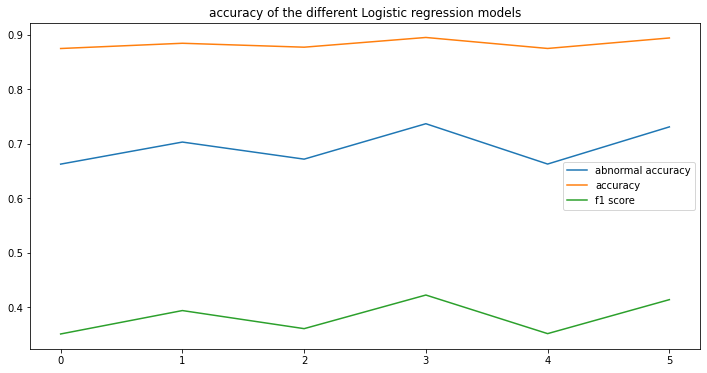

In [64]:
#display the results
plt.figure(figsize = (12, 6))
plt.plot(metrics_lr, label = ("abnormal accuracy", "accuracy", "f1 score"))
plt.title("accuracy of the different Logistic regression models")
plt.legend()
plt.show()

In [65]:
metrics_lr[3]

[0.7368573918094685, 0.8952537572518386, 0.42224138331227723]

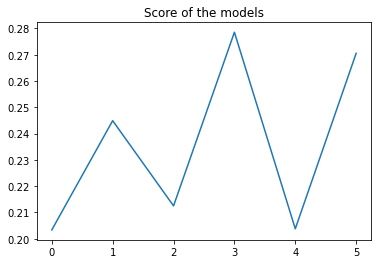

In [66]:
#multiply all metrics together
acc_lr = []
abn_acc_lr = []
f1_lr = []
for i in range(len(metrics_lr)):
    acc_lr.append(metrics_lr[i][0])
    abn_acc_lr.append(metrics_lr[i][1])
    f1_lr.append(metrics_lr[i][2])

mult_classif(acc_lr, abn_acc_lr, f1_lr)

The best LR model is thus obtained using a multinomial class with scaled data

# KNN

In [67]:
# Neighbors classifier 
neighbors = [4, 5, 6]
acc_rec_knn = []
abn_acc_rec_knn = []
f1_knn = []
for n in neighbors :
    #train model with  normal data and test it
    knn = KNeighborsClassifier(n_neighbors=n)
    accuracy = abn_accu_classifier(knn, x_train, y_train, x_val, y_val)
    acc_rec_knn.append(accuracy[1])
    abn_acc_rec_knn.append(accuracy[0])
    f1_knn.append(accuracy[2])
    
    #train model with scaled data and test it
    accuracy = abn_accu_classifier(knn, x_train_scale, y_train, x_val_scale, y_val)
    acc_rec_knn.append(accuracy[1])
    abn_acc_rec_knn.append(accuracy[0])
    f1_knn.append(accuracy[2])
    
    #train model with PCA data and test it
    accuracy = abn_accu_classifier(knn, x_train_pca, y_train, x_val_pca, y_val)
    acc_rec_knn.append(accuracy[1])
    abn_acc_rec_knn.append(accuracy[0])
    f1_knn.append(accuracy[2])

[0.9410397908800465, 0.9384257914609352, 0.9410397908800465, 0.9446703456288121, 0.9411850130699971, 0.9446703456288121, 0.9379901248910834, 0.9356665698518734, 0.9379901248910834]
[0.9784843086199808, 0.9773879676579417, 0.9784843086199808, 0.9789411173541638, 0.9776163720250332, 0.9789411173541638, 0.9777077337718697, 0.9766570736832488, 0.9777077337718697]


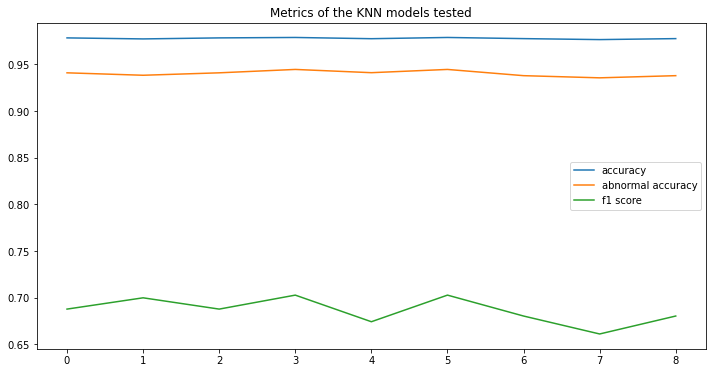

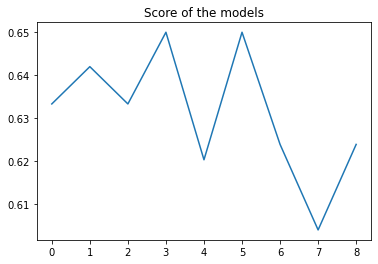

In [68]:
# Display of the results
print(abn_acc_rec_knn)
print(acc_rec_knn)

plt.figure(figsize=(12, 6))
plt.plot(acc_rec_knn, label = "accuracy")
plt.plot(abn_acc_rec_knn, label = "abnormal accuracy")
plt.plot(f1_knn, label = "f1 score")
plt.legend()
plt.title("Metrics of the KNN models tested")
plt.show()

mult_classif(acc_rec_knn, abn_acc_rec_knn, f1_knn)


In [69]:
print(abn_acc_rec_knn[3], acc_rec_knn[3], f1_knn[3])

0.9446703456288121 0.9789411173541638 0.7027321658126323


The best KNN model is thus obtained using 5 neighbors and normal data.

# SVM

In [70]:
#Vector classification
gamma = ['scale', 'auto']
kernel = ['linear', 'rbf'] #add poly as well
acc_rec_svm = []
param_svm = []
for g in gamma:
    for k in kernel :
        svm = SVC(gamma = g, kernel = k, max_iter=2000)
        #train model with normal data
        acc_rec_svm.append(abn_accu_classifier(svm, x_train, y_train, x_val, y_val))
        param_svm.append(('normal', g, k))
        #train model with scaled data
        acc_rec_svm.append(abn_accu_classifier(svm, x_train_scale, y_train, x_val_scale, y_val))
        param_svm.append(('scale', g, k))
        #train model with PCA data
        acc_rec_svm.append(abn_accu_classifier(svm, x_train_pca, y_train, x_val_pca, y_val))
        param_svm.append(('pca', g, k))

C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver t

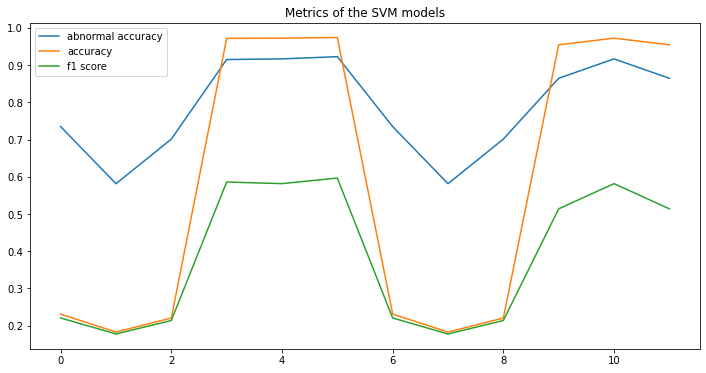

In [71]:
#display results
plt.figure(figsize=(12, 6))
plt.plot(acc_rec_svm, label = ("abnormal accuracy", "accuracy", "f1 score"))
plt.legend()
plt.title("Metrics of the SVM models")
plt.show()

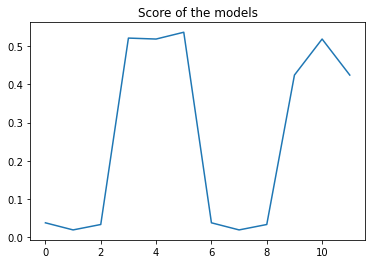

[0.864652918966018, 0.9546388926956283, 0.513997526837181]

In [72]:
#extract and multiply all metrics together
acc_svm = []
abn_acc_svm = []
f1_svm = []
for i in range(len(acc_rec_svm)):
    acc_svm.append(acc_rec_svm[i][0])
    abn_acc_svm.append(acc_rec_svm[i][1])
    f1_svm.append(acc_rec_svm[i][2])

mult_classif(acc_svm, abn_acc_svm, f1_svm)
acc_rec_svm[11]

The best SVM model is thus obtained with gamma = auto, kernel = rbf with PCA data

# Validation of the 7 best models using the validation set

In [147]:
test_metrics = []

#best MLP model with one layer
mlp1 = MLPClassifier(hidden_layer_sizes=(200), activation = 'relu', max_iter = 100)
test_metrics.append(abn_accu_classifier(mlp1, x_train, y_train, x_test, y_test))

#best MLP with normal data and 3 layers
mlp3 = MLPClassifier(hidden_layer_sizes=(100, 150, 50), activation = 'tanh', max_iter = 100)
test_metrics.append(abn_accu_classifier(mlp3, x_train, y_train, x_test, y_test))

#best MLP with normal data and 4 layers 
mlp4 = MLPClassifier(hidden_layer_sizes=(150, 150, 50, 150), activation = 'relu', max_iter = 100)
test_metrics.append(abn_accu_classifier(mlp4, x_train, y_train, x_test, y_test))

#best MLP with scaled data
mlp_scale = MLPClassifier(hidden_layer_sizes=(150, 150, 50, 150), activation = 'tanh', max_iter = 100)
test_metrics.append(abn_accu_classifier(mlp_scale, x_train_scale, y_train, x_test_scale, y_test))

#best MLP with PCA data
mlp_pca = MLPClassifier(hidden_layer_sizes=(50, 50, 150, 150), activation = 'relu', max_iter = 100)
test_metrics.append(abn_accu_classifier(mlp_pca, x_train_pca, y_train, x_test_pca, y_test))

#Best logistic regression
lr = LogisticRegression(multi_class = 'multinomial', max_iter = 1000)
test_metrics.append(abn_accu_classifier(lr, x_train_scale, y_train, x_test_scale, y_test))

#Best KNN model
knn = KNeighborsClassifier(n_neighbors=5)
test_metrics.append(abn_accu_classifier(knn, x_train, y_train, x_test, y_test))

# Best SVM model
svm = SVC(gamma = 'scale', kernel = 'rbf', max_iter=2000)
test_metrics.append(abn_accu_classifier(svm, x_train_pca, y_train, x_test_pca, y_test))

C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vpdt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vpdt\anaconda3\l

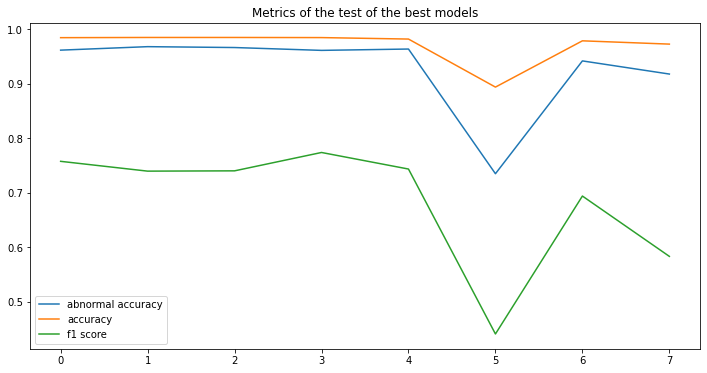

In [148]:
plt.figure(figsize=(12, 6))
plt.plot(test_metrics, label = ("abnormal accuracy", "accuracy", "f1 score"))
plt.legend()
plt.title("Metrics of the test of the best models")
plt.show()

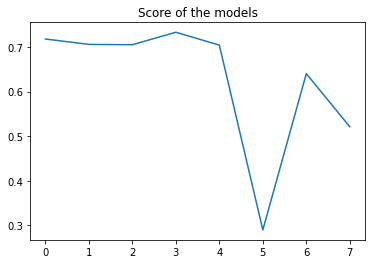

In [149]:
#multiply all metrics together
acc_test = []
abn_acc_test = []
f1_test = []
for i in range(len(test_metrics)):
    acc_test.append(test_metrics[i][0])
    abn_acc_test.append(test_metrics[i][1])
    f1_test.append(test_metrics[i][2])

mult_classif(acc_test, abn_acc_test, f1_test)

In [150]:
test_metrics[2]

[0.9665988963113564, 0.985062354392216, 0.7403882434662462]

Text(0.5, 1.0, 'F1 scores of the best models')

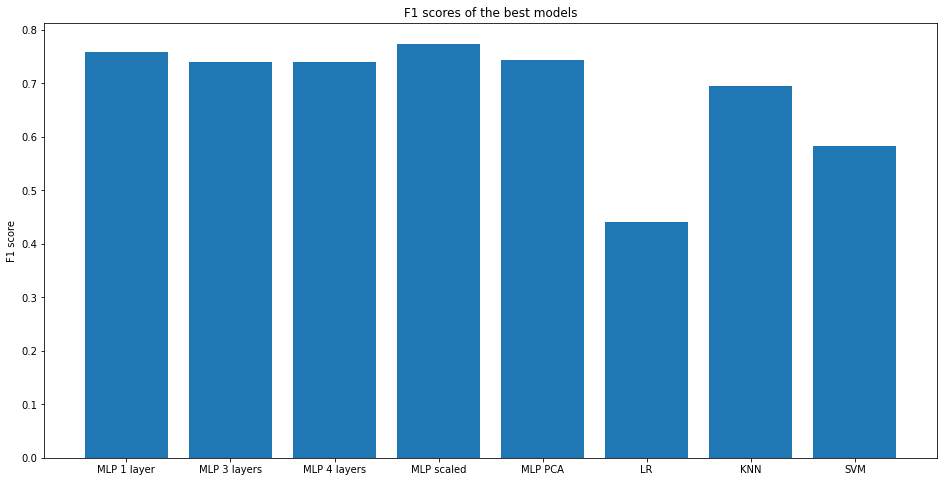

In [151]:
#Bar plot of the f1 scores of the best models
fig, ax = plt.subplots(figsize= (16, 8))
ax.bar(models, f1_test)
ax.set_ylabel("F1 score")
ax.set_title("F1 scores of the best models")

The best model is the MLP using scaled data, it has the highest score(product of the 3 metrics).

Accuracy: 0.9848339500251245
Precision: 0.886340832488702
Recall: 0.7426865482993189
F1 Score: 0.7740650349949174
Weighted F1 Score: 0.9842943871315454


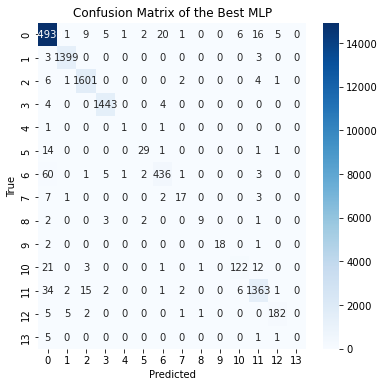

In [152]:
    # Confusion matrix of the best MLP model
    y_pred = mlp_scale.predict(x_test_scale)
    # print the scores
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division= 1.0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division= 1.0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division= 1.0)
    weighted_f1 = f1_score(y_test, y_pred, average = 'weighted', zero_division = 1.0)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Weighted F1 Score: {weighted_f1}")
    
    #display the confusion matrix
    plt.figure(figsize=(6,6))
    confusion_mat =confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix of the Best MLP')
    plt.show()

Accuracy: 0.9788954364807455
Precision: 0.9047481435488149
Recall: 0.6585364801019965
F1 Score: 0.6941493249822804
Weighted F1 Score: 0.9775428144527706


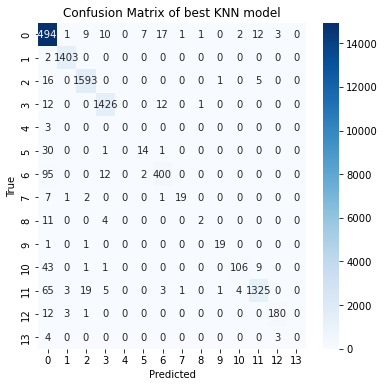

In [114]:
#Confusion matrix of the best KNN model
y_pred = knn.predict(x_test)

# print the scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division= 1.0)
recall = recall_score(y_test, y_pred, average='macro', zero_division= 1.0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division= 1.0)
weighted_f1 = f1_score(y_test, y_pred, average = 'weighted', zero_division = 1.0)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Weighted F1 Score: {weighted_f1}")

#display the confusion matrix
plt.figure(figsize=(6,6))
confusion_mat =confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of best KNN model')
plt.show()


Accuracy: 0.8940203736695446
Precision: 0.6490023302219144
Recall: 0.4022209154289082
F1 Score: 0.4411320439571775
Weighted F1 Score: 0.8860701373007469


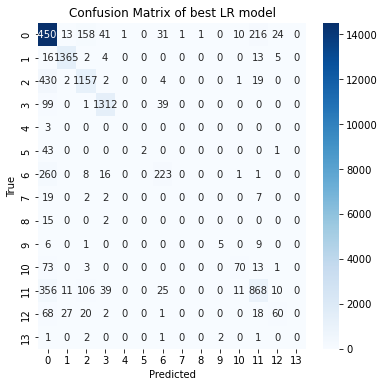

In [117]:
# Confusion matrix of the best LR model
y_pred = lr.predict(x_test_scale)

# print the scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division= 1.0)
recall = recall_score(y_test, y_pred, average='macro', zero_division= 1.0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division= 1.0)
weighted_f1 = f1_score(y_test, y_pred, average = 'weighted', zero_division = 1.0)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Weighted F1 Score: {weighted_f1}")

#display the confusion matrix
plt.figure(figsize=(6,6))
confusion_mat =confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of best LR model')
plt.show()


Accuracy: 0.9728655611895299
Precision: 0.9664122561216371
Recall: 0.5596075425246685
F1 Score: 0.5834822526026606
Weighted F1 Score: 0.9695735128292713


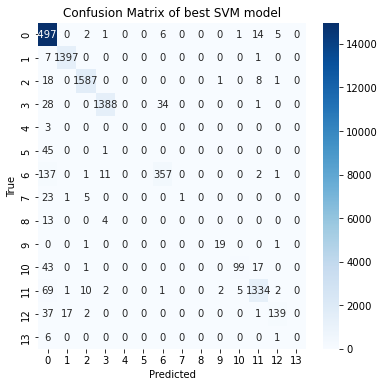

In [118]:
# Confusion matrix of the best SVM model
y_pred = svm.predict(x_test_pca)

# print the scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division= 1.0)
recall = recall_score(y_test, y_pred, average='macro', zero_division= 1.0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division= 1.0)
weighted_f1 = f1_score(y_test, y_pred, average = 'weighted', zero_division = 1.0)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Weighted F1 Score: {weighted_f1}")

#display the confusion matrix
plt.figure(figsize=(6,6))
confusion_mat =confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of best SVM model')
plt.show()


In [155]:
test_metrics[3]

[0.9613708974731339, 0.9848339500251245, 0.7740650349949174]